In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

In [3]:
k = 4
eta = 0.01
sigma = 2.5
n_samples = 2000

In [4]:
from sklearn import datasets
two_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = two_moons

In [5]:
X.shape

(2000, 2)

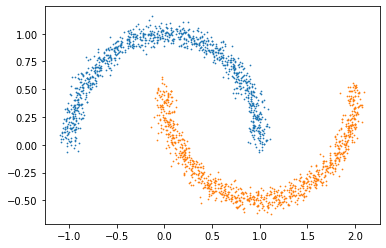

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

for c in range(2):
    cluster_members = [X[i] for i in range(len(X)) if y[i] == c]    
    cluster_members = np.array(cluster_members)

    ax.scatter(cluster_members[:,0], cluster_members[:,1],  s= 0.5)

In [7]:
from graph_utils import *

In [8]:
A = affinity_graph(X)

In [9]:
(A - A.transpose()).sum()

0.0

In [10]:
A[A>eta] = 0

In [11]:
np.amax(A)

0.009999921321952246

In [12]:
np.amin(A)

0.0

In [13]:
D = A.sum(axis=1)

In [14]:
D.shape

(2000,)

In [15]:
DD = np.diag(D)

In [16]:
DD

array([[0.16524401, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.19832052, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.21484823, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.16638549, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.21850733,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.26137475]])

In [17]:
L = DD - A

In [26]:
import scipy.sparse.linalg as linalg


In [23]:
scipy.__version__

'1.5.4'

In [55]:
vals, vecs = linalg.eigs(L, k=2, which='SR')

In [48]:
vals

array([ 4.08580625e-17+0.j, -1.53470205e-17+0.j])

In [49]:
np.amin(vals)

(-1.5347020532935082e-17+0j)

In [50]:
ind = np.argsort(vals, axis=0)

In [51]:
ind

array([1, 0])

In [56]:
vals = vals[ind]
vecs = vecs[:,ind]

In [57]:
vals.shape

(2,)

In [58]:
vecs.shape

(2000, 2)